In [134]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import re

In [135]:
duration = pd.read_csv('duration.csv', delimiter=' ')
duration.head()

,"product_id;""productcategory_id"";""material_id"";""outer_diameter"";""inner_diameter"";""height"";""weight"";""heattreatmentcategory_id"";""workplace_id"";""duration_seconds"",,"
0,"25;""S6"";""1.4021"";""399"";""300"";""30"";""51,""1980186..."
1,"25;""S6"";""1.4021"";""399"";""300"";""30"";""51,""1980186..."
2,"25;""S6"";""1.4021"";""399"";""300"";""30"";""51,""1980186..."
3,"25;""S6"";""1.4021"";""399"";""300"";""30"";""51,""1980186..."
4,"25;""S6"";""1.4021"";""399"";""300"";""30"";""51,""1980186..."


In [136]:
duration['combined'] = duration.astype(str)
# Split the 'combined' column by semicolon (;) into separate columns
clean_duration = duration['combined'].str.split(';', expand=True)


In [137]:
column_names = ['product_id', 'productcategory_id', 'material_id', 'outer_diameter', 
                'inner_diameter', 'height', 'weight', 'heattreatmentcategory_id', 
                'workplace_id', 'duration_seconds']

# Assign column names to the split data
clean_duration.columns = column_names


In [138]:
clean_duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25,"""S6""","""1.4021""","""399""","""300""","""30""","""51,""1980186835613""""","""""1""""","""""50501""""","""""5100"",""000000"""""""
1,25,"""S6""","""1.4021""","""399""","""300""","""30""","""51,""1980186835613""""","""""1""""","""""50501""""","""""12240"",""000000"""""""
2,25,"""S6""","""1.4021""","""399""","""300""","""30""","""51,""1980186835613""""","""""1""""","""""50501""""","""""4080"",""000000"""""""
3,25,"""S6""","""1.4021""","""399""","""300""","""30""","""51,""1980186835613""""","""""1""""","""""50501""""","""""9120"",""000000"""""""
4,25,"""S6""","""1.4021""","""399""","""300""","""30""","""51,""1980186835613""""","""""1""""","""""50501""""","""""30600"",""000000"""""""


In [139]:
clean_duration = clean_duration.applymap(lambda x: str(x).replace('"', '').strip())

C:\Users\jmeri\AppData\Local\Temp\ipykernel_25648\2282400639.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_duration = clean_duration.applymap(lambda x: str(x).replace('"', '').strip())


In [140]:
clean_duration['weight'] = clean_duration['weight'].astype(str).str.replace('"', '').str.split(',')
clean_duration['weight'] = clean_duration['weight'].apply(lambda x: float(x[0]) + float(x[1]) if len(x) == 2 else float(x[0]))
clean_duration['duration_seconds'] = (clean_duration['duration_seconds'].astype(str).str.replace('"', '').str.replace(',', ''))


In [141]:
clean_duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25,S6,1.4021,399,300,30,1.980187e+12,1,50501,5100000000
1,25,S6,1.4021,399,300,30,1.980187e+12,1,50501,12240000000
2,25,S6,1.4021,399,300,30,1.980187e+12,1,50501,4080000000
3,25,S6,1.4021,399,300,30,1.980187e+12,1,50501,9120000000
4,25,S6,1.4021,399,300,30,1.980187e+12,1,50501,30600000000


In [142]:
clean_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                12687 non-null  object 
 1   productcategory_id        12687 non-null  object 
 2   material_id               12687 non-null  object 
 3   outer_diameter            12687 non-null  object 
 4   inner_diameter            12687 non-null  object 
 5   height                    12687 non-null  object 
 6   weight                    12687 non-null  float64
 7   heattreatmentcategory_id  12687 non-null  object 
 8   workplace_id              12687 non-null  object 
 9   duration_seconds          12687 non-null  object 
dtypes: float64(1), object(9)
memory usage: 991.3+ KB


In [143]:
print(clean_duration['material_id'].unique())


['1.4021' '1.4462' '1.4501' '1.0566' '1.1181' '1.4539' '1.0460' '1.0488'
 '1.7709' '1.1191' '1.0487' '1.5415' '1.0503' '1.0570' '1.7225' '2.4856'
 '1.4922' '1.3539' '1.4122' '1.4571' '1.4006' '1.4301' '1.3536' '1.4034'
 '1.4541' '1.3974' '1.4988' '1.5637' '1.4404' '1.0601' '----' '1.4435 ESU'
 '2.1247' '1.7362G' '1.4548 ESU' '1.4112' '1.4903' '1.4542' '1.6580'
 '1.7362V' '1.8507' '1.4418 mod.' '1.4944 ESU' '1.7131' '1.7362' '1.4305'
 '1.7380' '1.8882' '1.4401' '2.4602' '1.4418' '1.4306' '1.7258' '2.4858'
 '1.0038' '2.4668' '1.4923' '3.7035' '1.0432' '1.6310' '1.4057' '1.6368'
 '1.4410' '1.7383' '1.4462-A3' '2.4816' '1.4429 ESU' '1.4565' '1.4313'
 '1.2842' '1.3505' '2.4375.60' '1.5920' '1.5919' '1.4507' '1.4547'
 '2.4951' '1.2436' '1.7335' '1.0437' '2.0070' '2.4819' '1.4926' '1.4529'
 '1.4913' '1.0562' '1.4550' '1.7035' '1.0571' '2.4360' '1.4980'
 '1.4401/1.4404' '1.0425' '1.8905' '1.4104' '1.7219' '1.8928' '1.0037'
 '1.0477' '1.4301/1.4306' 'Ck 45 Sonderana' '1.8912' '1.8915' '1.4438'


In [144]:
# Strip quotes, remove trailing text, and fix known non-numeric values
clean_duration['material_id'] = (
    clean_duration['material_id']
    .astype(str)
    .str.strip()
    .str.replace('"', '')
    .str.replace(' ESU', '', regex=False)
    .str.replace(' mod.', '', regex=False)
    .str.replace('G', '', regex=False)
    .str.replace('V', '', regex=False)
    .str.replace('A3', '', regex=False)
    .str.replace(' / ', '/', regex=False)
    .str.replace('2.4375.60', '2.4375')
)

# Convert non-numeric entries to NaN
non_numeric_mask = ~clean_duration['material_id'].str.replace('.', '', regex=False).str.isnumeric()
clean_duration.loc[non_numeric_mask, 'material_id'] = np.nan

# Now safely convert to float
clean_duration['material_id'] = clean_duration['material_id'].astype(float)


In [145]:
clean_duration['product_id'] = clean_duration['product_id'].astype(float)
clean_duration['outer_diameter'] = clean_duration['outer_diameter'].astype(float)
clean_duration['inner_diameter'] = clean_duration['inner_diameter'].astype(float)
clean_duration['height'] = clean_duration['height'].astype(float)
clean_duration['heattreatmentcategory_id'] = clean_duration['heattreatmentcategory_id'].astype(float)
clean_duration['workplace_id'] = clean_duration['workplace_id'].replace('', np.nan).astype(float)
clean_duration['duration_seconds'] = clean_duration['duration_seconds'].astype(float)

In [146]:
clean_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                12687 non-null  float64
 1   productcategory_id        12687 non-null  object 
 2   material_id               12408 non-null  float64
 3   outer_diameter            12687 non-null  float64
 4   inner_diameter            12687 non-null  float64
 5   height                    12687 non-null  float64
 6   weight                    12687 non-null  float64
 7   heattreatmentcategory_id  12687 non-null  float64
 8   workplace_id              7349 non-null   float64
 9   duration_seconds          12687 non-null  float64
dtypes: float64(9), object(1)
memory usage: 991.3+ KB


In [147]:
clean_duration.to_csv('clean_duration.csv', index=False)

In [148]:
clean_duration.describe()

,product_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
count,12687.000000,12408.000000,12687.000000,12687.000000,12687.000000,1.268700e+04,12687.000000,7349.000000,1.268700e+04
mean,3810.700796,1.469834,875.034760,454.651533,132.319146,2.312473e+12,1.494837,50764.692475,3.546900e+09
std,2047.595577,0.344315,4080.872342,334.329717,115.252568,1.355753e+13,1.674465,1575.356204,6.128280e+09
min,25.000000,1.003700,80.000000,10.000000,10.000000,0.000000e+00,0.000000,50501.000000,0.000000e+00
25%,2029.500000,1.402100,360.000000,229.000000,52.000000,1.040624e+11,0.000000,50501.000000,3.600000e+08
50%,3871.000000,1.430600,514.000000,360.000000,94.000000,5.497489e+11,1.000000,50510.000000,1.140000e+09
75%,5629.000000,1.457100,736.000000,570.000000,180.000000,9.375003e+11,4.000000,50513.000000,4.020000e+09
max,7372.000000,3.723500,95818.000000,3147.000000,1550.000000,5.891493e+14,6.000000,70003.000000,8.628000e+10


In [149]:
clean_duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25.0,S6,1.4021,399.0,300.0,30.0,1.980187e+12,1.0,50501.0,5.100000e+09
1,25.0,S6,1.4021,399.0,300.0,30.0,1.980187e+12,1.0,50501.0,1.224000e+10
2,25.0,S6,1.4021,399.0,300.0,30.0,1.980187e+12,1.0,50501.0,4.080000e+09
3,25.0,S6,1.4021,399.0,300.0,30.0,1.980187e+12,1.0,50501.0,9.120000e+09
4,25.0,S6,1.4021,399.0,300.0,30.0,1.980187e+12,1.0,50501.0,3.060000e+10


In [150]:
stainless_steel_energy = pd.read_csv('stainless_steel_energy.csv')
stainless_steel_energy.head()

,"productcategory_id;""material_id"";""outer_diameter"";""height"";""weight"";""heattreatmentcategory_id"";""heattreatment_temperatures"";""forming_temperatures"";""dimension"";""input_weight"";""workplace_id"";""product_id"";""mes_datetime"";""value""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"S6;""1.4021"";""399"";""30"";""51","1980186835613"";""1"";"""";"""";"""";""0"";""50513"";""25"";""...",NaN,NaN,NaN,NaN,NaN,NaN
1,"S6;""1.4021"";""399"";""30"";""51","1980186835613"";""1"";"""";"""";"""";""0"";""50513"";""25"";""...",NaN,NaN,NaN,NaN,NaN,NaN
2,"S6;""1.4021"";""399"";""30"";""51","1980186835613"";""1"";"""";"""";"""";""0"";""50513"";""25"";""...",NaN,NaN,NaN,NaN,NaN,NaN
3,"S6;""1.4021"";""399"";""30"";""51","1980186835613"";""1"";"""";"""";"""";""0"";""50513"";""25"";""...",NaN,NaN,NaN,NaN,NaN,NaN
4,"S6;""1.4021"";""399"";""30"";""51","1980186835613"";""1"";"""";"""";"""";""0"";""50513"";""25"";""...",NaN,NaN,NaN,NaN,NaN,NaN


In [151]:

stainless_steel_energy['combined'] = (stainless_steel_energy["productcategory_id;\"material_id\";\"outer_diameter\";\"height\";\"weight\";\"heattreatmentcategory_id\";\"heattreatment_temperatures\";\"forming_temperatures\";\"dimension\";\"input_weight\";\"workplace_id\";\"product_id\";\"mes_datetime\";\"value\""] + stainless_steel_energy["Unnamed: 1"]).astype(str)
# Split the 'combined' column by semicolon (;) into separate columns
clean_steel = stainless_steel_energy['combined'].str.split(';', expand=True)
columns = ['productcategory_id','material_id','outer_diameter','height','weight','heattreatmentcategory_id','heattreatment_temperatures','forming_temperatures','dimension','input_weight','workplace_id','product_id','mes_datetime','value']

# Assign column names to the split data
clean_steel.columns = columns

In [152]:
clean_steel.head()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
0,S6,"""1.4021""","""399""","""30""","""511980186835613""","""1""","""""","""""","""""","""0""","""50513""","""25""","""2012-04-16 13:25:00""","""58"""
1,S6,"""1.4021""","""399""","""30""","""511980186835613""","""1""","""""","""""","""""","""0""","""50513""","""25""","""2012-04-16 13:26:00""","""58"""
2,S6,"""1.4021""","""399""","""30""","""511980186835613""","""1""","""""","""""","""""","""0""","""50513""","""25""","""2012-04-16 13:27:00""","""58"""
3,S6,"""1.4021""","""399""","""30""","""511980186835613""","""1""","""""","""""","""""","""0""","""50513""","""25""","""2012-04-16 13:28:00""","""58"""
4,S6,"""1.4021""","""399""","""30""","""511980186835613""","""1""","""""","""""","""""","""0""","""50513""","""25""","""2012-04-16 13:29:00""","""58"""


In [153]:
clean_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   productcategory_id          40582 non-null  object
 1   material_id                 40543 non-null  object
 2   outer_diameter              40543 non-null  object
 3   height                      40543 non-null  object
 4   weight                      40543 non-null  object
 5   heattreatmentcategory_id    40543 non-null  object
 6   heattreatment_temperatures  40543 non-null  object
 7   forming_temperatures        40543 non-null  object
 8   dimension                   40543 non-null  object
 9   input_weight                40543 non-null  object
 10  workplace_id                40543 non-null  object
 11  product_id                  40543 non-null  object
 12  mes_datetime                40543 non-null  object
 13  value                       40543 non-null  ob

In [156]:
def clean_material(val):
    if pd.isna(val):
        return np.nan
    # Remove quotes and whitespace
    val = str(val).strip().replace('"', '')
    # Use regex to extract only the numeric part
    match = re.match(r'(\d+\.?\d*)', val)
    if match:
        return float(match.group(1))
    else:
        return np.nan

def clean_and_convert_material_column(df, column_name):
    # First clean and normalize the string content
    df[column_name] = (
        df[column_name]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
        .replace(['', 'nan', 'NaN'], np.nan)
    )
    # Then apply regex cleaning and conversion
    df[column_name] = df[column_name].apply(clean_material)
    return df[column_name]


In [157]:
for col in clean_steel.columns:
    if col == 'productcategory_id':
        continue
    if col == 'mes_datetime':
        clean_steel[col] = (clean_steel[col].astype(str).str.strip().str.replace('"', '', regex=False).replace(['None', 'none', 'NaN', 'nan', ''], np.nan))
        clean_steel[col] = pd.to_datetime(clean_steel[col])
    else:
        clean_steel[col] = clean_and_convert_material_column(clean_steel,col)


In [158]:
clean_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   productcategory_id          40582 non-null  object        
 1   material_id                 39309 non-null  float64       
 2   outer_diameter              40543 non-null  float64       
 3   height                      40543 non-null  float64       
 4   weight                      40531 non-null  float64       
 5   heattreatmentcategory_id    40543 non-null  float64       
 6   heattreatment_temperatures  0 non-null      float64       
 7   forming_temperatures        0 non-null      float64       
 8   dimension                   0 non-null      float64       
 9   input_weight                40543 non-null  float64       
 10  workplace_id                40543 non-null  float64       
 11  product_id                  40543 non-null  float64   

In [159]:
clean_steel.head()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
0,S6,1.4021,399.0,30.0,5.119802e+14,1.0,NaN,NaN,NaN,0.0,50513.0,25.0,2012-04-16 13:25:00,58.0
1,S6,1.4021,399.0,30.0,5.119802e+14,1.0,NaN,NaN,NaN,0.0,50513.0,25.0,2012-04-16 13:26:00,58.0
2,S6,1.4021,399.0,30.0,5.119802e+14,1.0,NaN,NaN,NaN,0.0,50513.0,25.0,2012-04-16 13:27:00,58.0
3,S6,1.4021,399.0,30.0,5.119802e+14,1.0,NaN,NaN,NaN,0.0,50513.0,25.0,2012-04-16 13:28:00,58.0
4,S6,1.4021,399.0,30.0,5.119802e+14,1.0,NaN,NaN,NaN,0.0,50513.0,25.0,2012-04-16 13:29:00,58.0


In [160]:
clean_steel.to_csv('clean_steel.csv', index=False)

In [161]:
clean_steel.describe()

,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
count,39309.000000,40543.000000,40543.000000,4.053100e+04,40543.000000,0.0,0.0,0.0,40543.0,40543.000000,40543.000000,40543,40543.000000
mean,1.444772,1074.323040,132.553511,3.485300e+14,1.324322,NaN,NaN,NaN,0.0,50513.277187,3815.673482,2012-06-27 11:44:23.176652032,81.324742
min,1.003700,122.000000,10.000000,0.000000e+00,0.000000,NaN,NaN,NaN,0.0,50512.000000,25.000000,2012-01-19 14:00:00,0.000000
25%,1.402100,400.000000,50.000000,1.468962e+14,0.000000,NaN,NaN,NaN,0.0,50513.000000,2209.000000,2012-04-18 09:44:30,55.000000
50%,1.430100,559.000000,90.000000,2.871191e+14,1.000000,NaN,NaN,NaN,0.0,50513.000000,3866.000000,2012-07-02 16:52:00,72.000000
75%,1.454700,800.000000,170.000000,5.119802e+14,2.000000,NaN,NaN,NaN,0.0,50513.000000,5578.000000,2012-09-07 16:41:30,86.000000
max,3.703500,95818.000000,1550.000000,9.988278e+14,6.000000,NaN,NaN,NaN,0.0,50516.000000,7356.000000,2012-11-15 06:41:00,421.000000
std,0.309766,5333.104413,138.867343,2.522801e+14,1.604410,NaN,NaN,NaN,0.0,0.678627,2007.971798,NaN,56.762903


In [164]:
clean_steel.shape

(40582, 14)

In [165]:
clean_duration.shape

(12687, 10)

In [167]:
clean_steel.isnull().sum()

productcategory_id                0
material_id                    1273
outer_diameter                   39
height                           39
weight                           51
heattreatmentcategory_id         39
heattreatment_temperatures    40582
forming_temperatures          40582
dimension                     40582
input_weight                     39
workplace_id                     39
product_id                       39
mes_datetime                     39
value                            39
dtype: int64

array([ 0., nan])

In [168]:
clean_duration.isnull().sum()

product_id                     0
productcategory_id             0
material_id                  279
outer_diameter                 0
inner_diameter                 0
height                         0
weight                         0
heattreatmentcategory_id       0
workplace_id                5338
duration_seconds               0
dtype: int64

<Axes: >

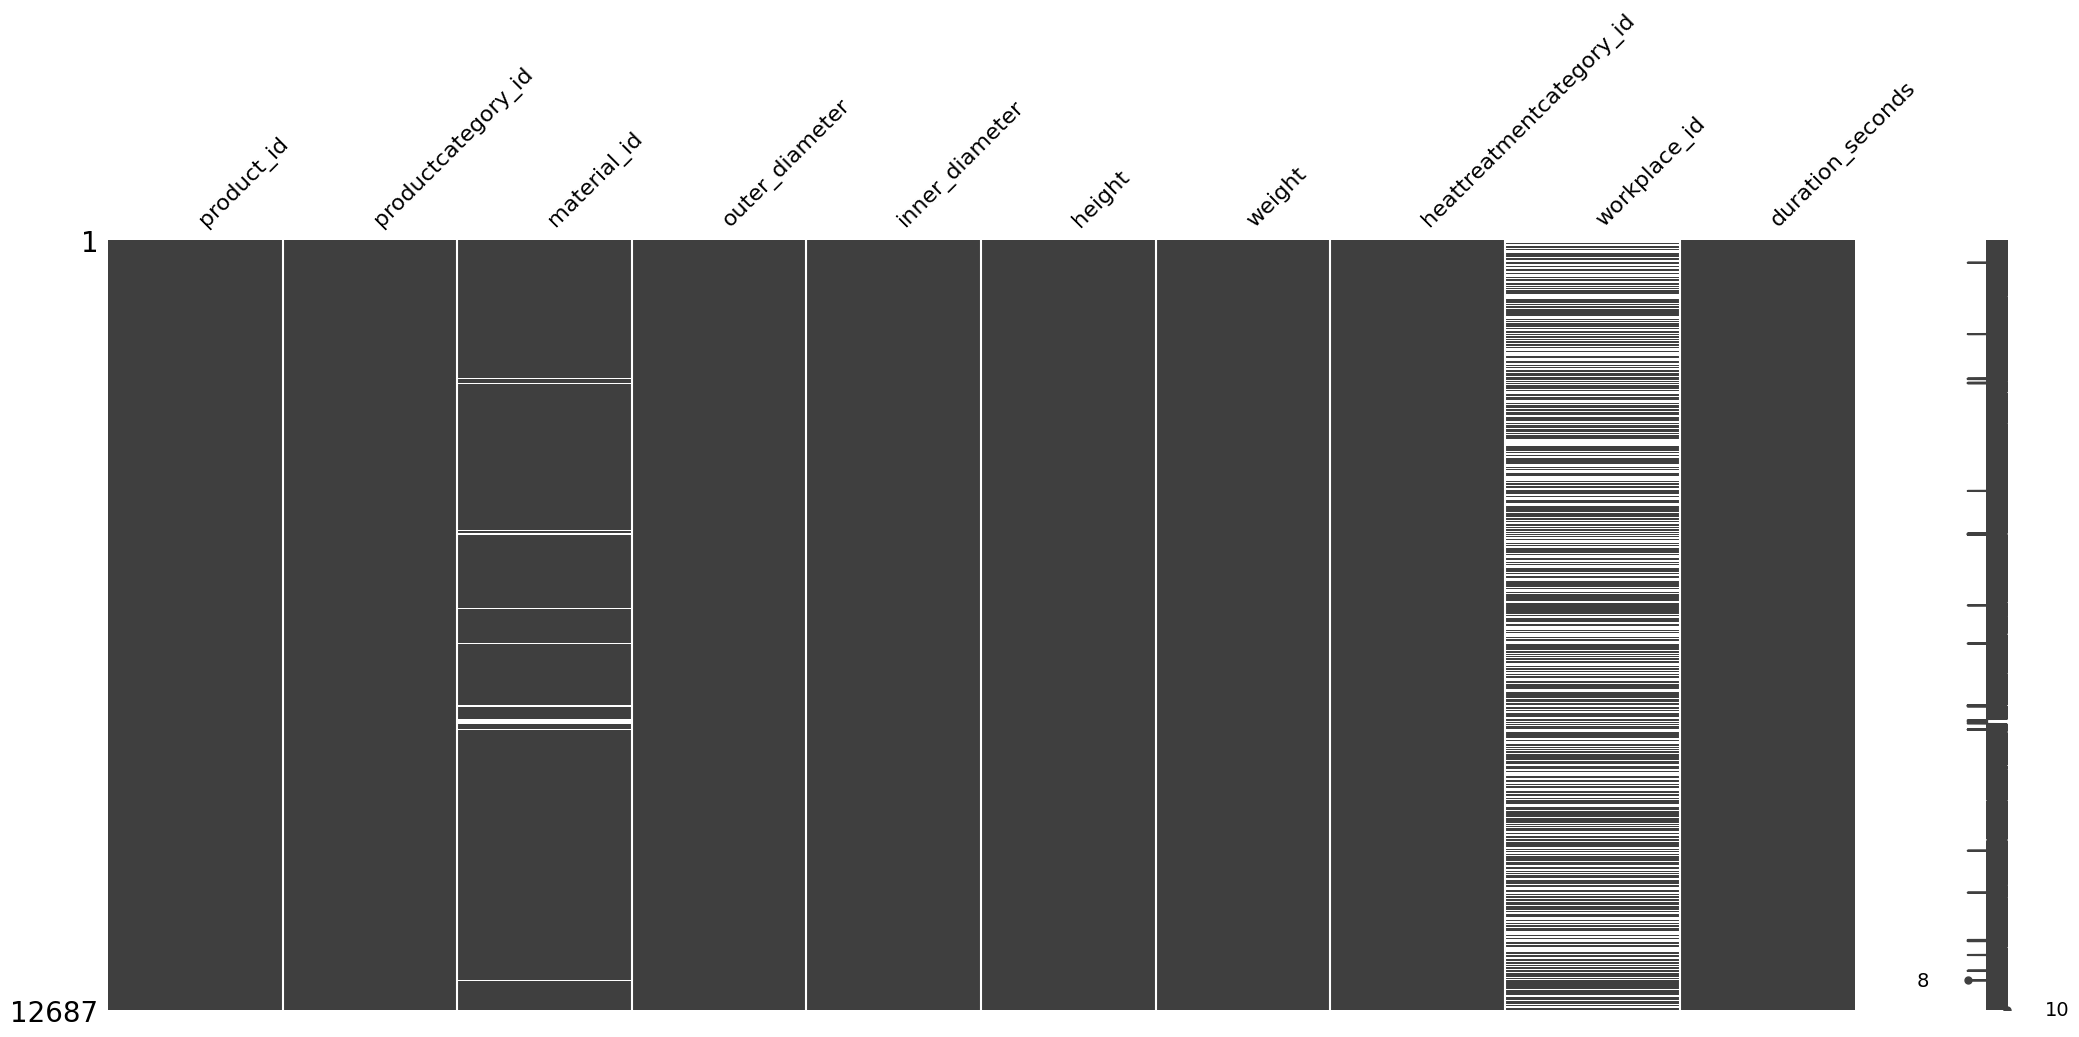

In [169]:
msno.matrix(clean_duration)

<Axes: >

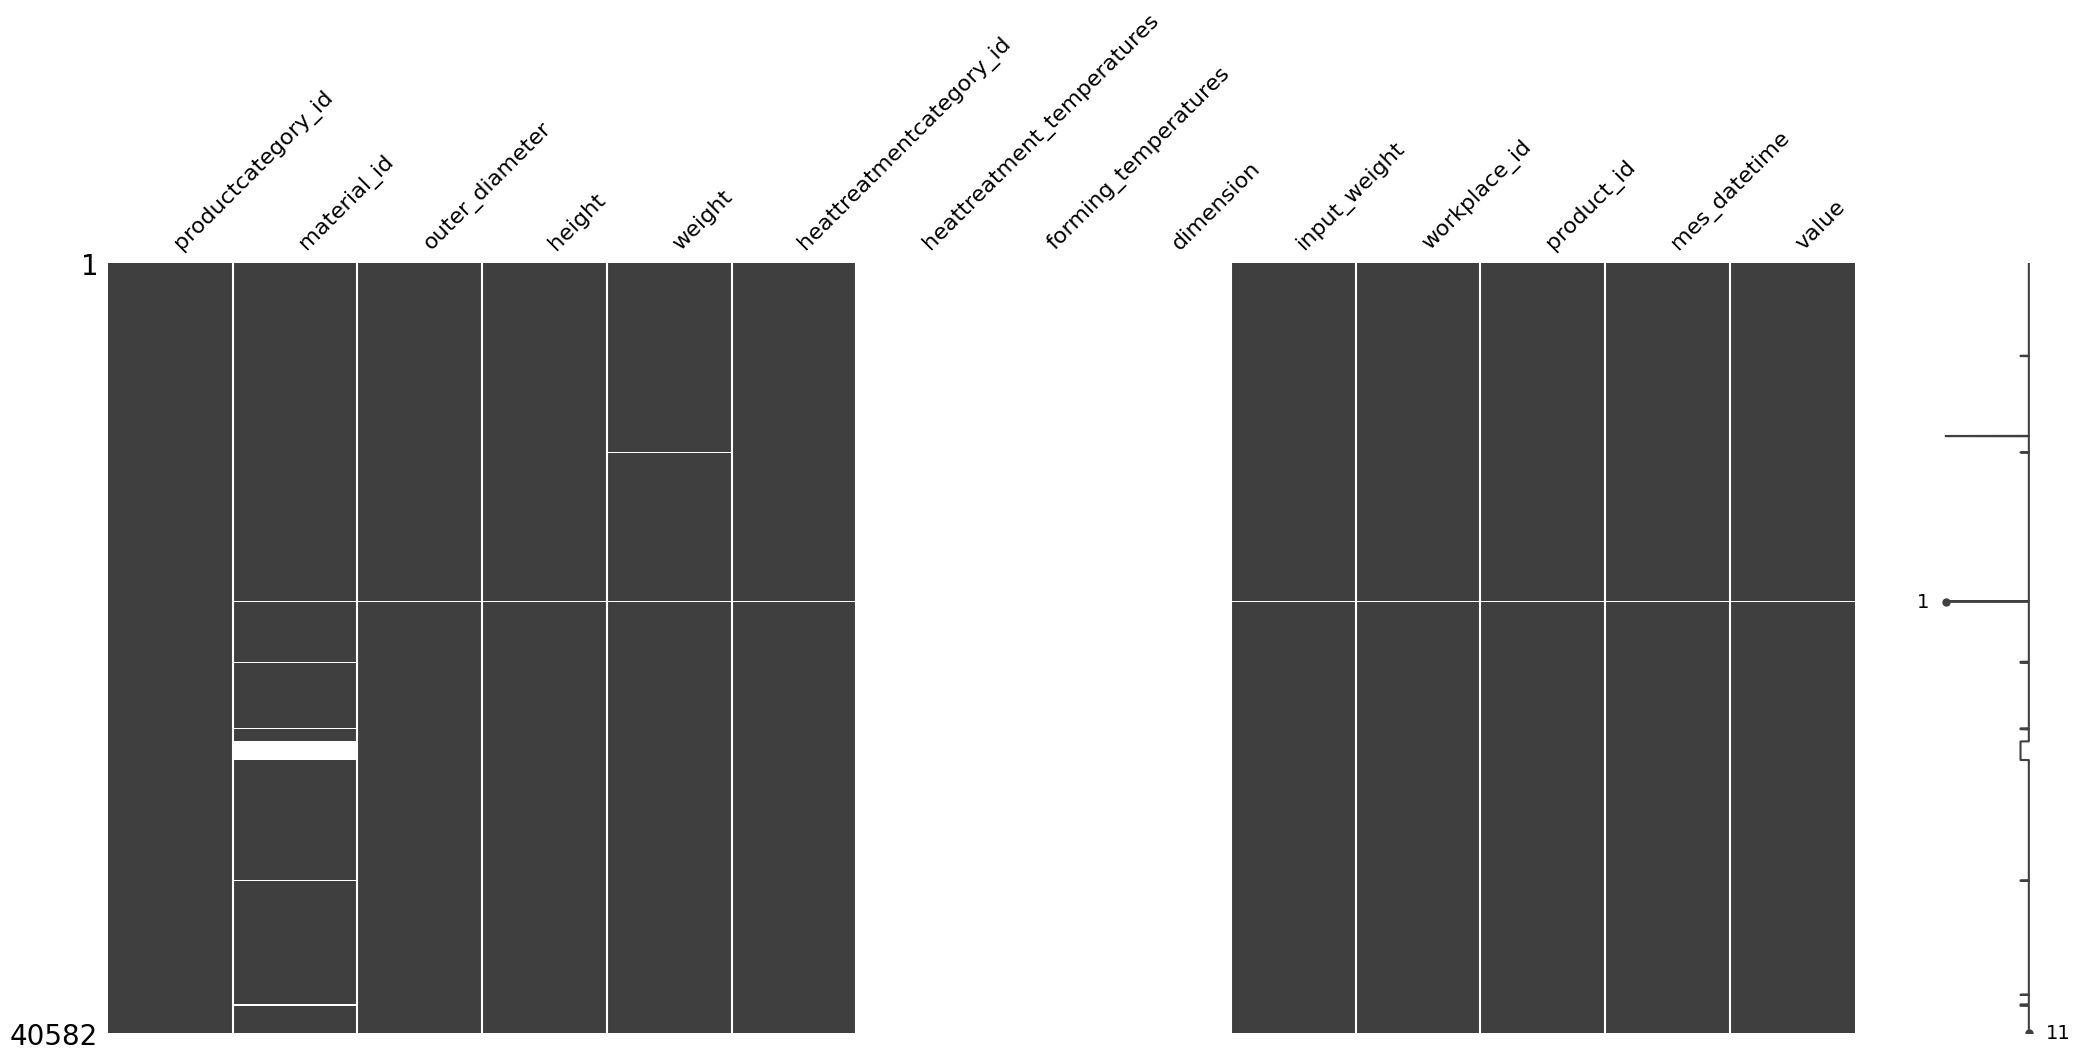

In [170]:
msno.matrix(clean_steel)

In [171]:
#dropping null values
# Drop rows with missing values in any column
clean_duration = clean_duration.dropna()


In [172]:
clean_duration.isnull().sum()

product_id                  0
productcategory_id          0
material_id                 0
outer_diameter              0
inner_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
duration_seconds            0
dtype: int64

In [173]:
clean_steel = clean_steel.drop(columns=['heattreatment_temperatures','forming_temperatures','dimension','input_weight'])
clean_steel.isnull().sum()

productcategory_id             0
material_id                 1273
outer_diameter                39
height                        39
weight                        51
heattreatmentcategory_id      39
workplace_id                  39
product_id                    39
mes_datetime                  39
value                         39
dtype: int64

In [174]:
clean_steel = clean_steel.dropna()
clean_steel.isnull().sum()

productcategory_id          0
material_id                 0
outer_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
product_id                  0
mes_datetime                0
value                       0
dtype: int64

In [175]:
clean_steel.shape

(39297, 10)

In [176]:
clean_duration.shape

(7169, 10)

In [177]:
clean_duration.duplicated().sum()

np.int64(123)

In [178]:
clean_duration = clean_duration.drop_duplicates()

In [179]:
clean_duration.duplicated().sum()

np.int64(0)

In [180]:
clean_steel.duplicated().sum()

np.int64(268)

In [181]:
clean_steel = clean_steel.drop_duplicates()

In [182]:
clean_steel.duplicated().sum()

np.int64(0)

In [183]:
clean_duration.dtypes

product_id                  float64
productcategory_id           object
material_id                 float64
outer_diameter              float64
inner_diameter              float64
height                      float64
weight                      float64
heattreatmentcategory_id    float64
workplace_id                float64
duration_seconds            float64
dtype: object

In [184]:
clean_steel.dtypes

productcategory_id                  object
material_id                        float64
outer_diameter                     float64
height                             float64
weight                             float64
heattreatmentcategory_id           float64
workplace_id                       float64
product_id                         float64
mes_datetime                datetime64[ns]
value                              float64
dtype: object

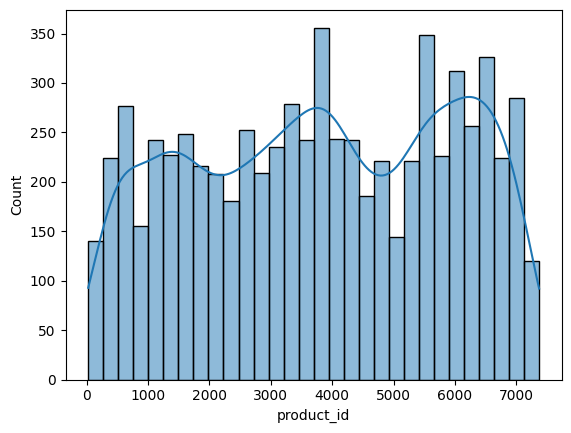

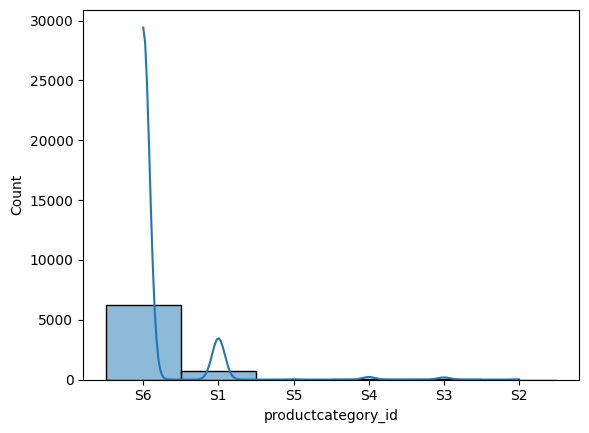

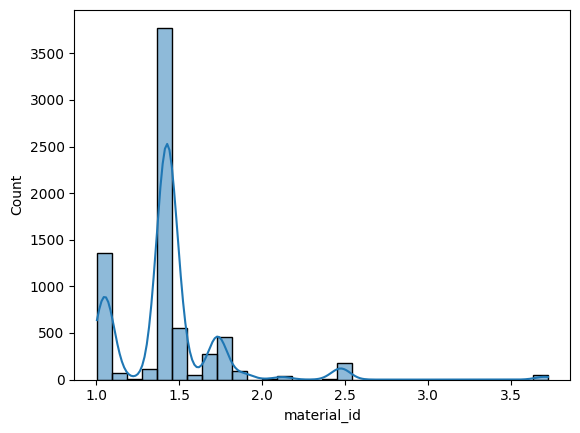

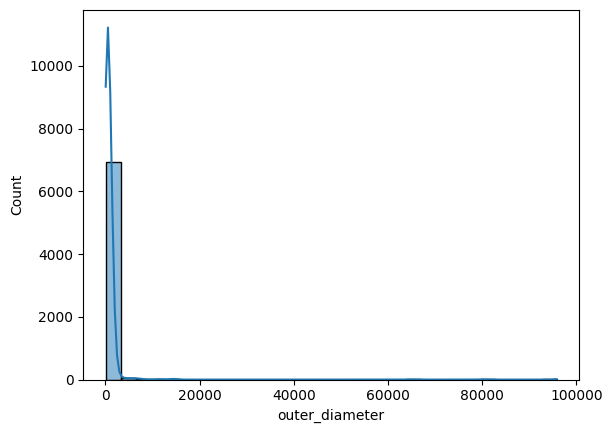

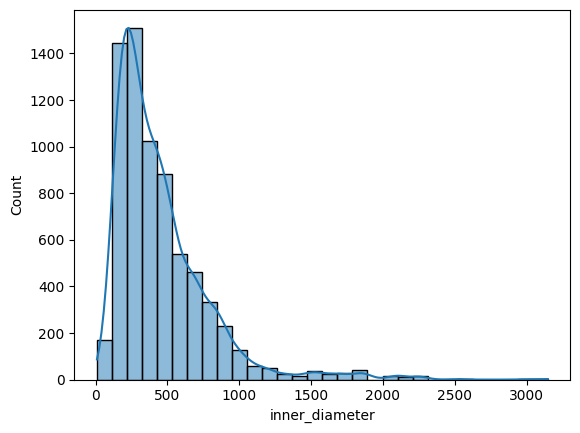

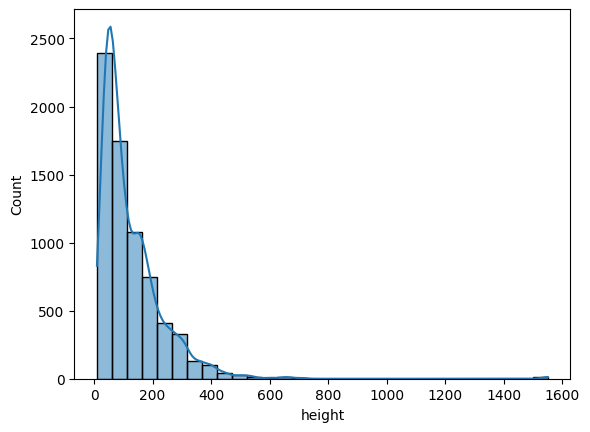

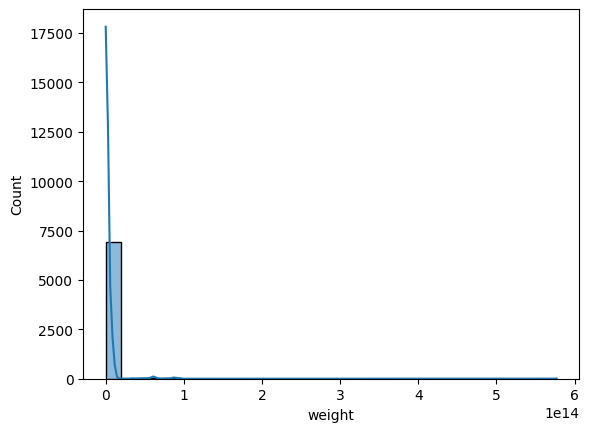

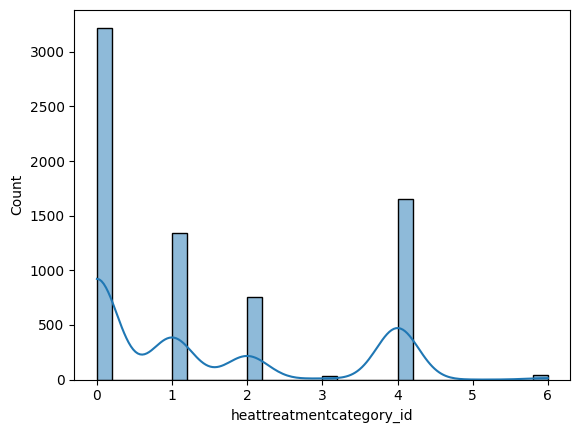

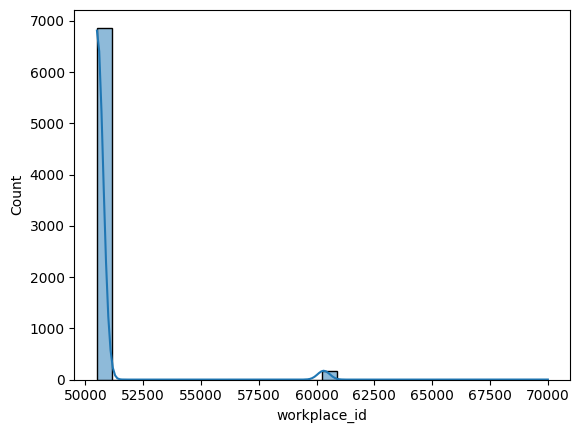

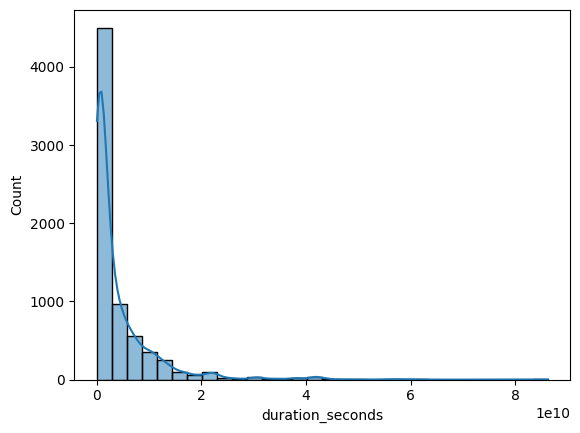

In [185]:
for col in clean_duration.columns:
    sns.histplot(clean_duration[col], bins=30, kde=True)
    plt.show()

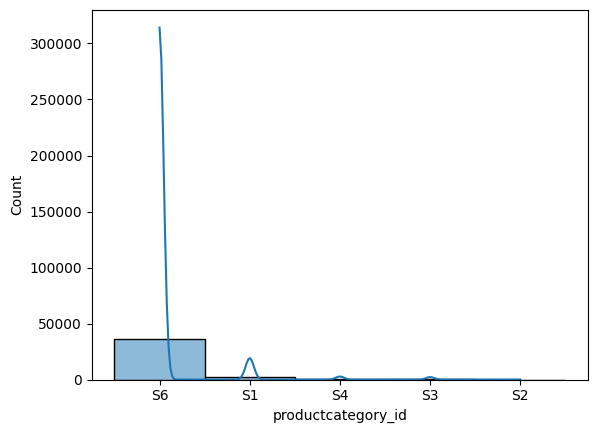

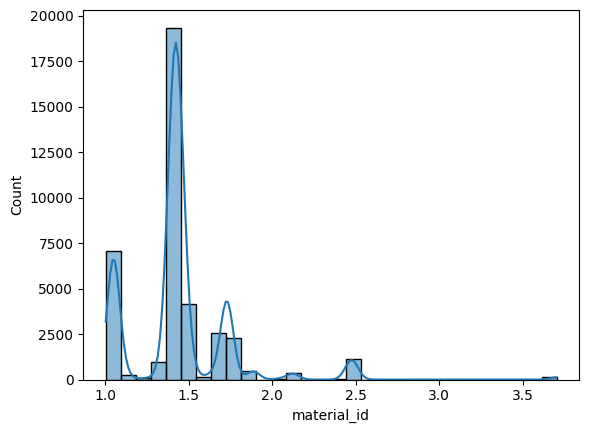

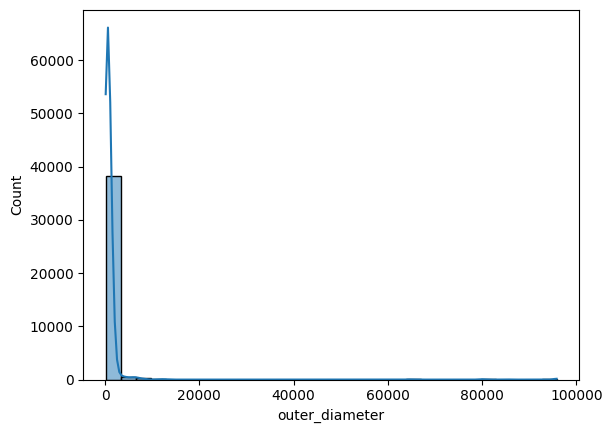

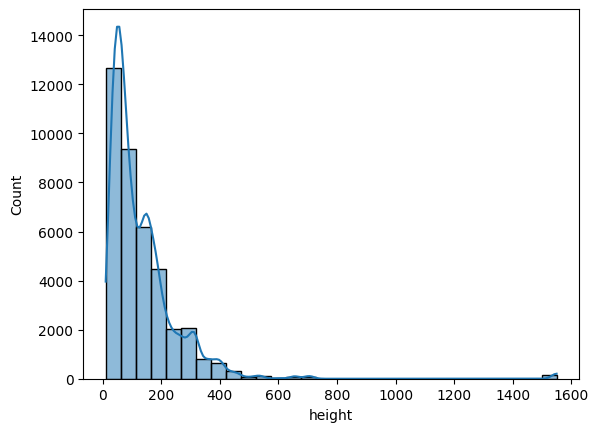

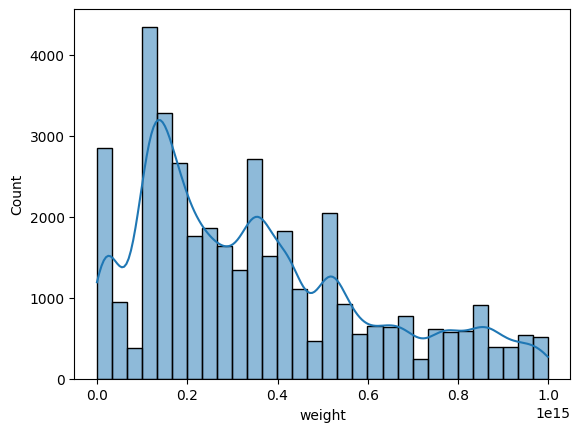

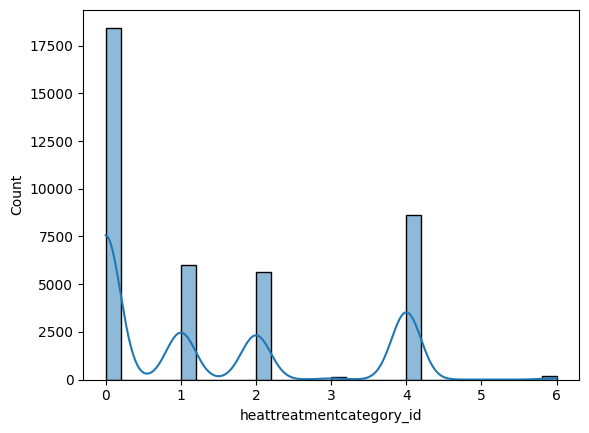

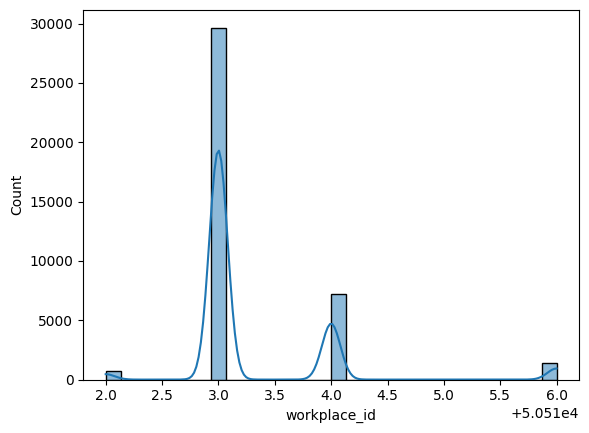

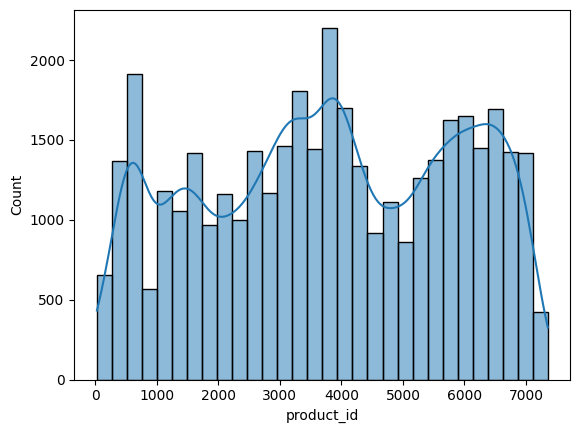

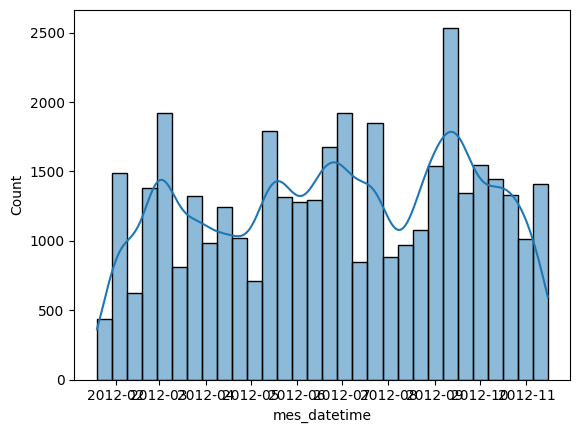

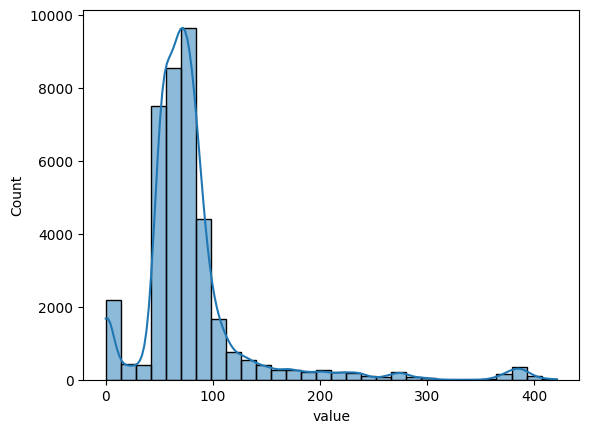

In [186]:
for col in clean_steel.columns:
    sns.histplot(clean_steel[col], bins=30, kde=True)
    plt.show()

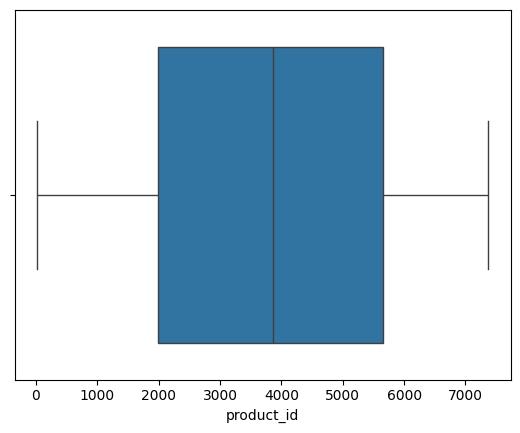

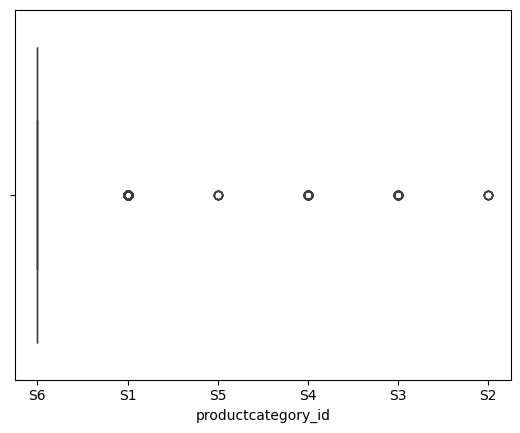

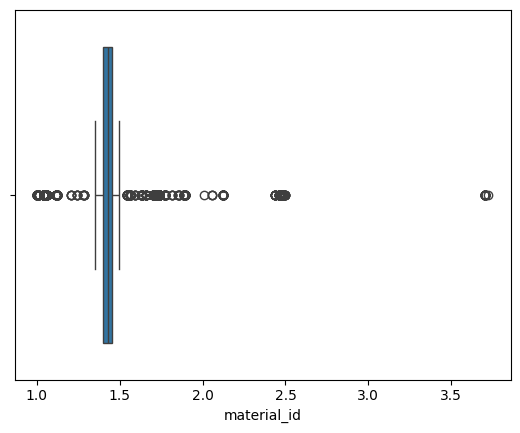

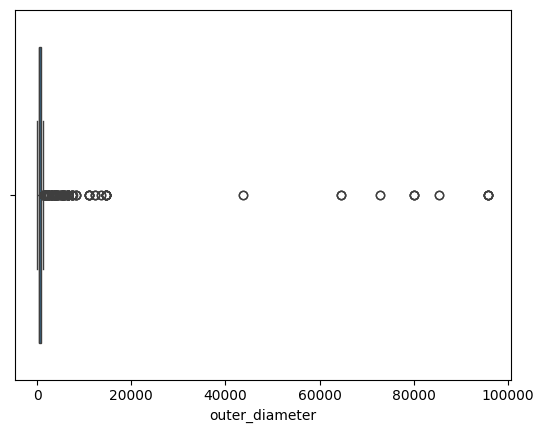

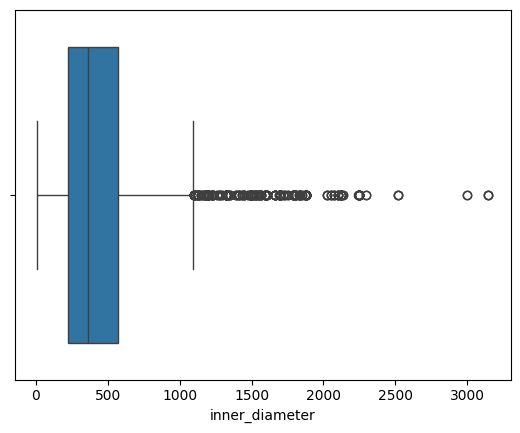

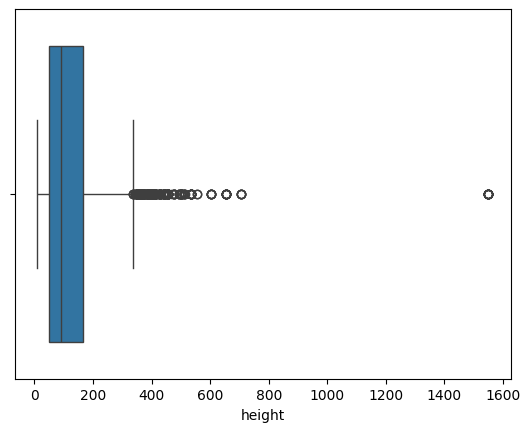

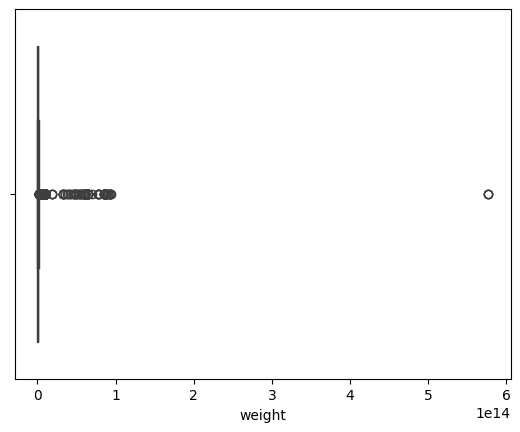

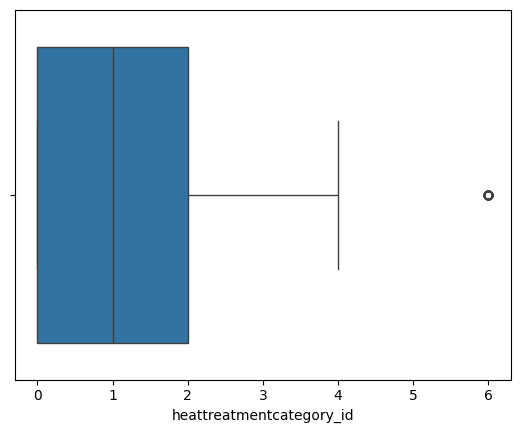

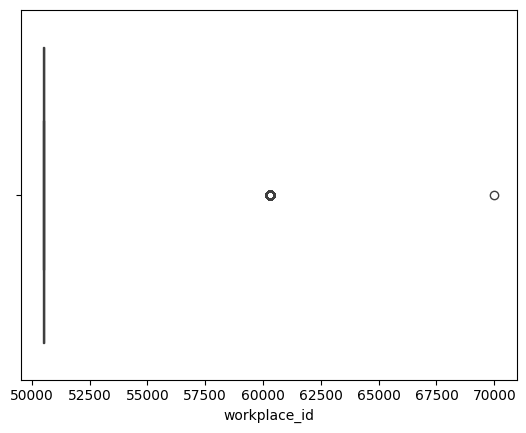

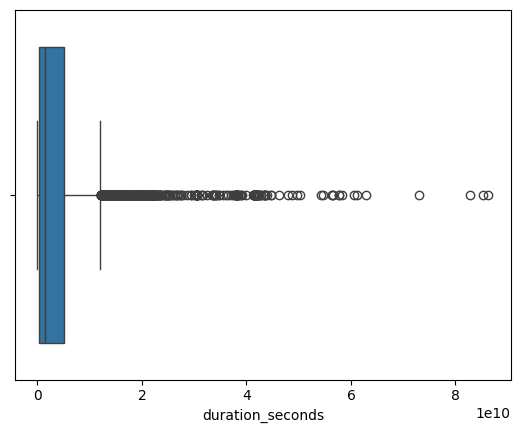

In [187]:
for col in clean_duration.columns:
    sns.boxplot(x=clean_duration[col])
    plt.show()

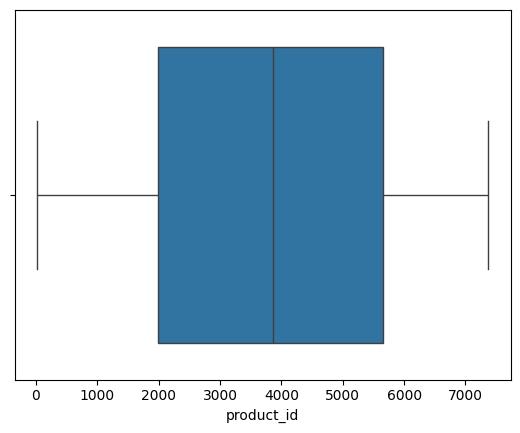

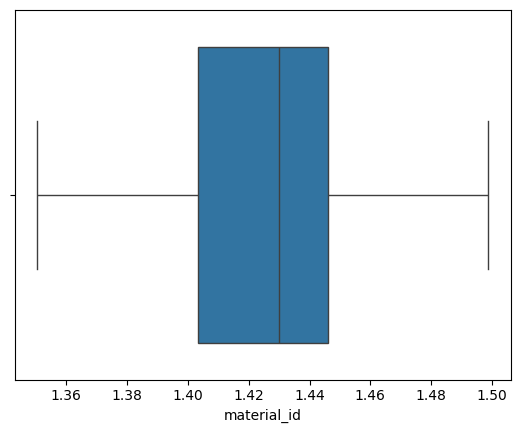

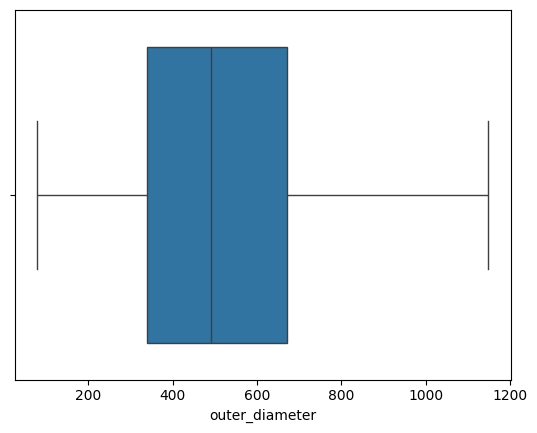

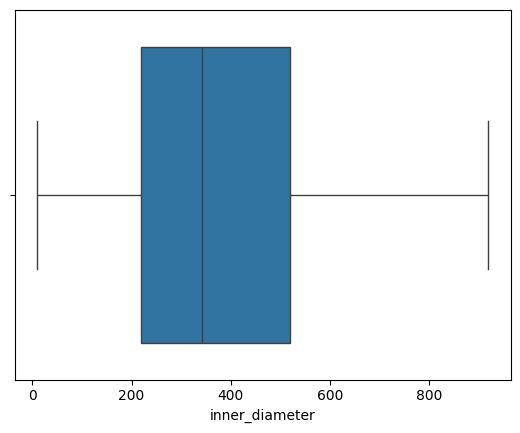

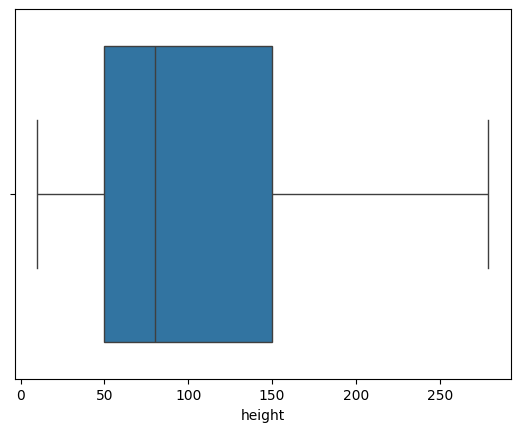

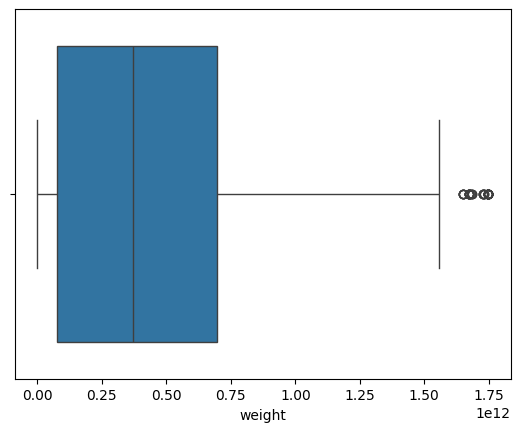

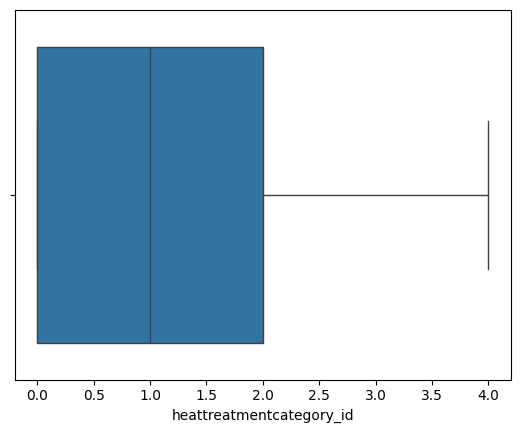

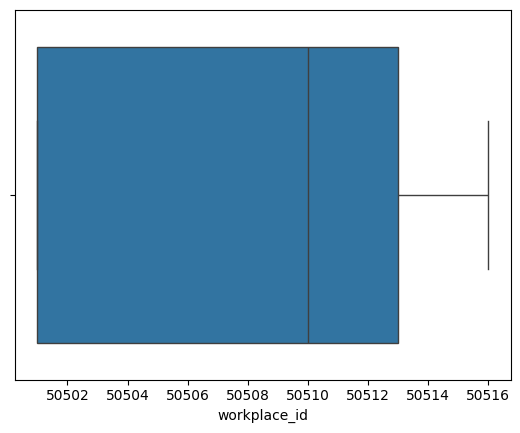

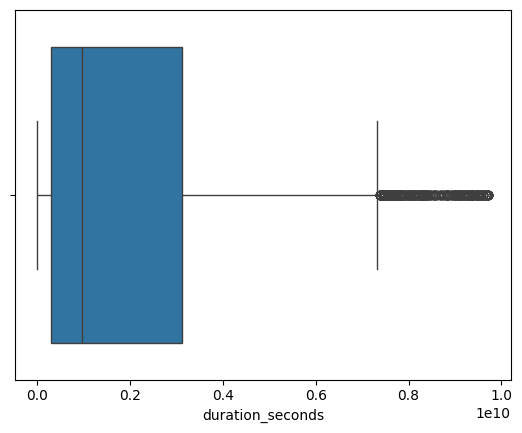

In [188]:
#removing outliers
# Remove rows with outliers basesed on IQR
for col in clean_duration.columns:
    #since id is an object and the same value
    if col != 'productcategory_id':
        Q1 = clean_duration[col].quantile(0.25)
        Q3 = clean_duration[col].quantile(0.75)
        # Calculate IQR
        IQR = Q3 - Q1
        # Define bounds
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        cleaned_clean_duration= clean_duration[(clean_duration[col] >= lower_bound) & (clean_duration[col] <= upper_bound)]
        #checking removed outliers
        sns.boxplot(x=cleaned_clean_duration[col])
        plt.show()


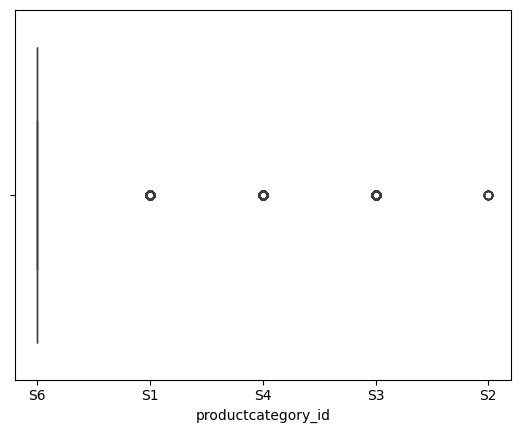

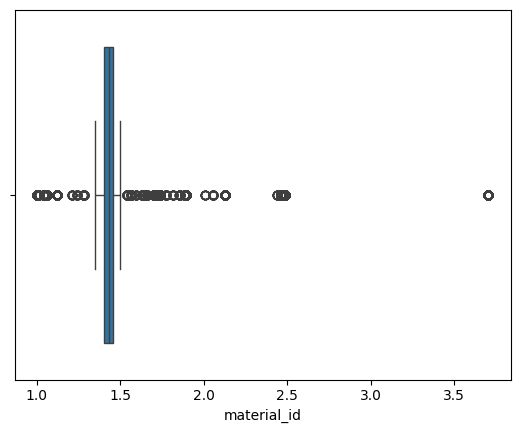

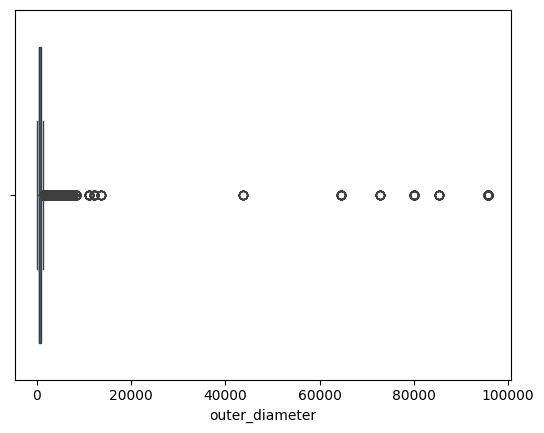

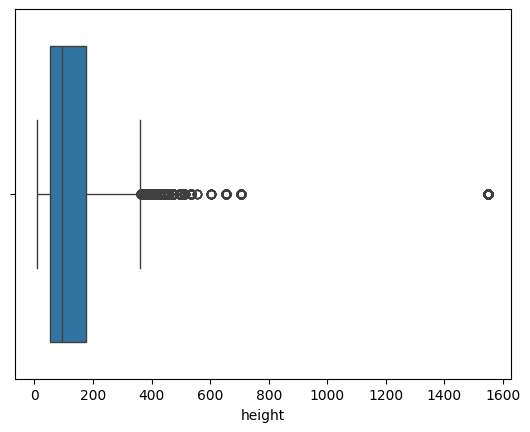

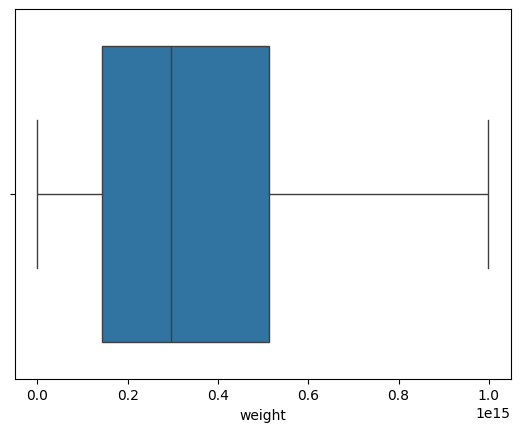

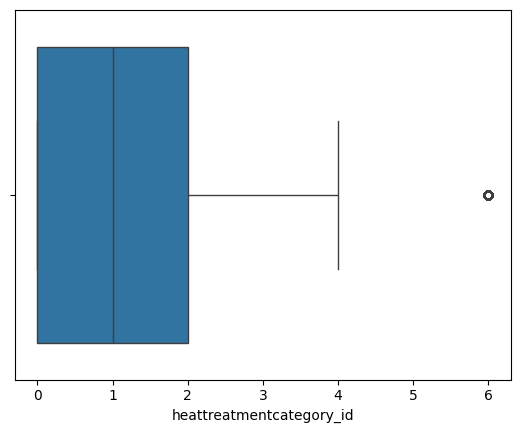

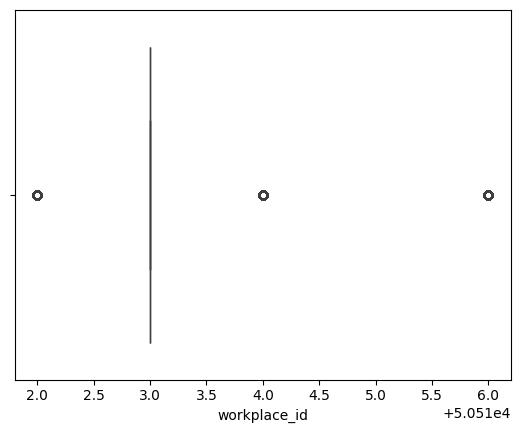

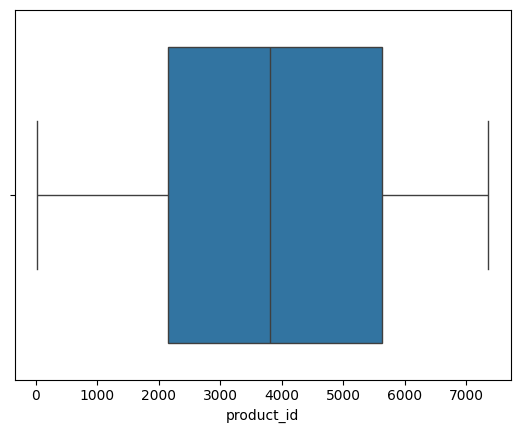

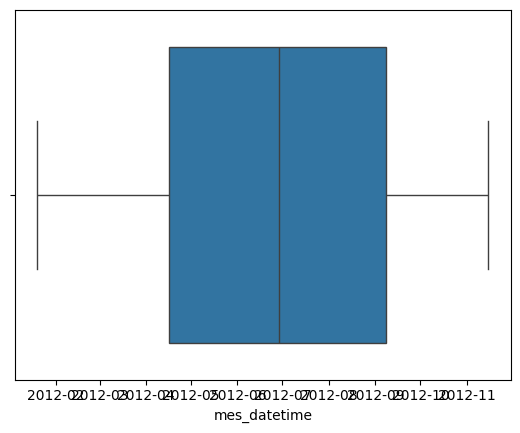

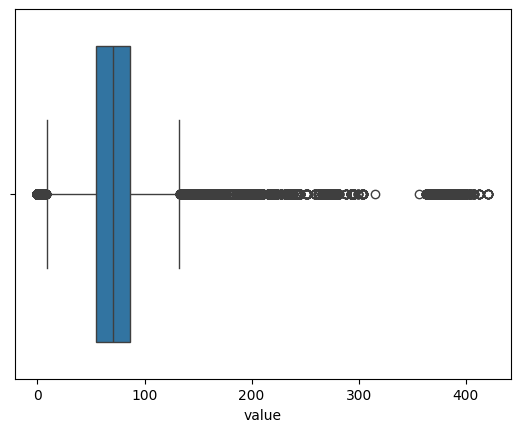

In [189]:
for col in clean_steel.columns:
    sns.boxplot(x=clean_steel[col])
    plt.show()

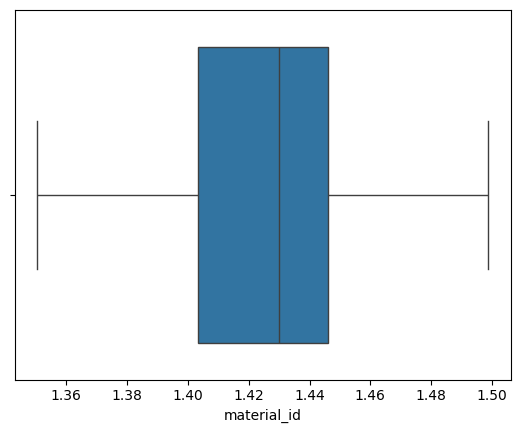

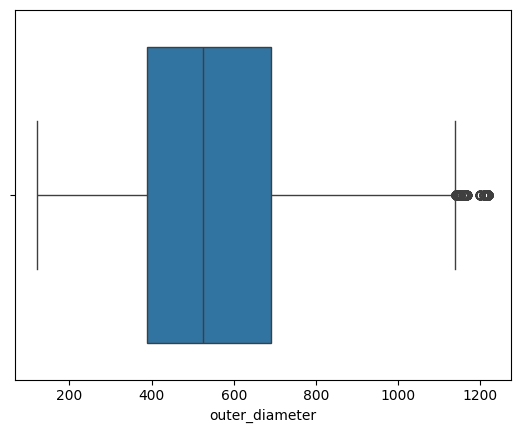

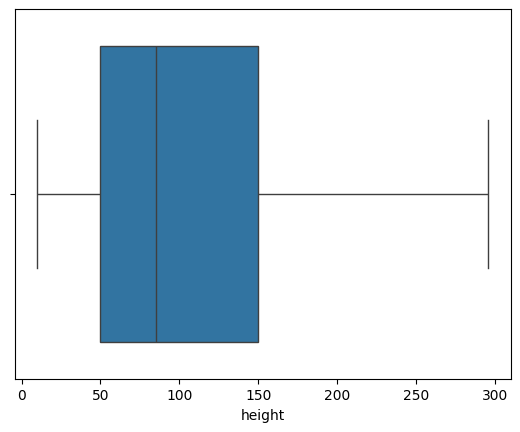

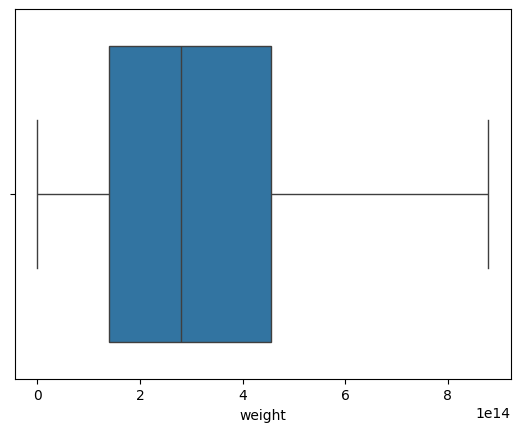

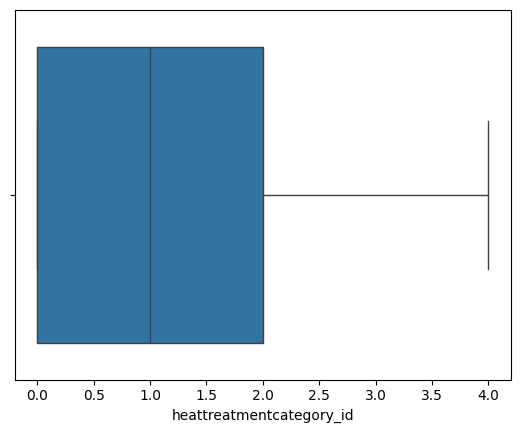

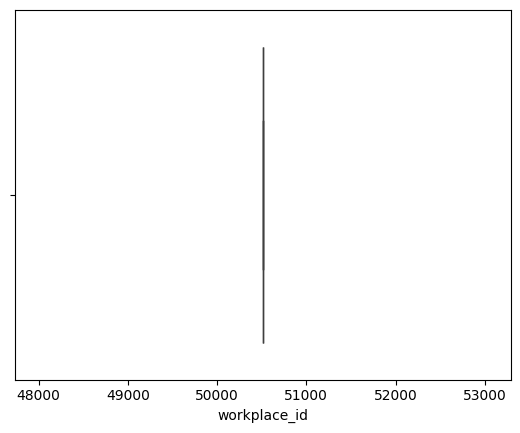

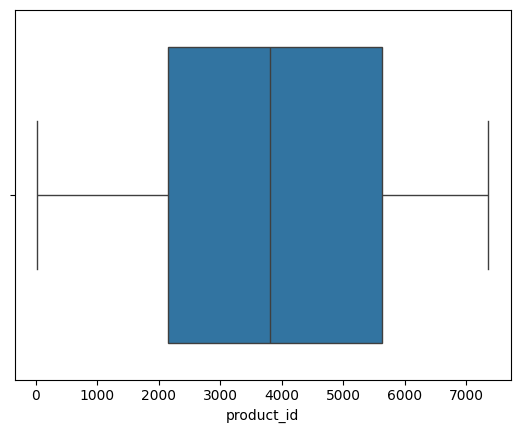

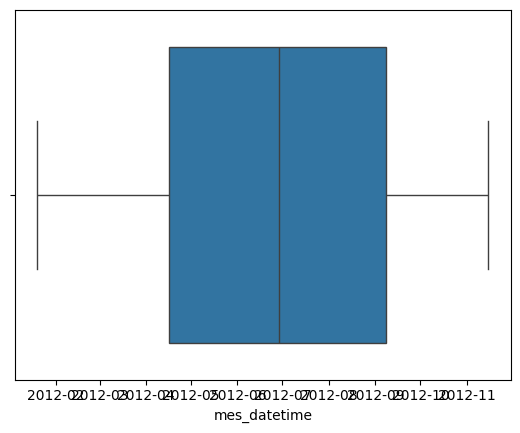

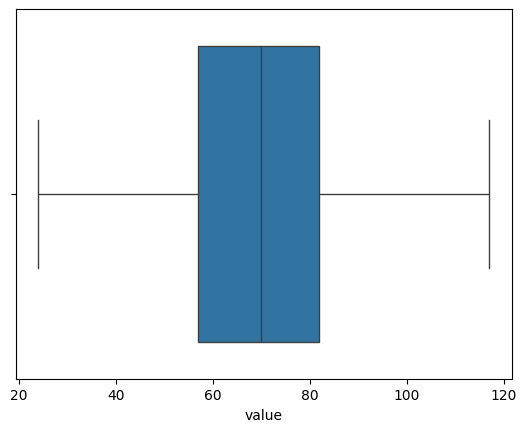

In [190]:
#removing outliers
# Remove rows with outliers basesed on IQR
for col in clean_steel.columns:
    if col != 'productcategory_id':
        Q1 = clean_steel[col].quantile(0.25)
        Q3 = clean_steel[col].quantile(0.75)
        # Calculate IQR
        IQR = Q3 - Q1
        # Define bounds
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        cleaned_clean_steel= clean_steel[(clean_steel[col] >= lower_bound) & (clean_steel[col] <= upper_bound)]
        #checking removed outliers
        sns.boxplot(x=cleaned_clean_steel[col])
        plt.show()

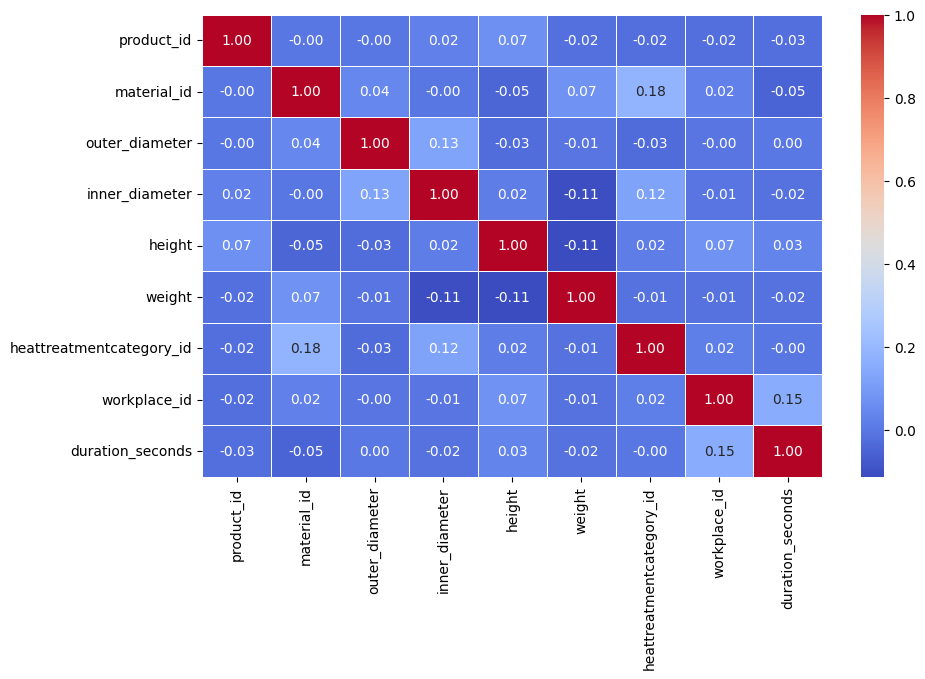

In [191]:
# Compute correlation matrix
numerical_columns_duration = cleaned_clean_duration.select_dtypes(include=['number'])
corr_matrix = numerical_columns_duration.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

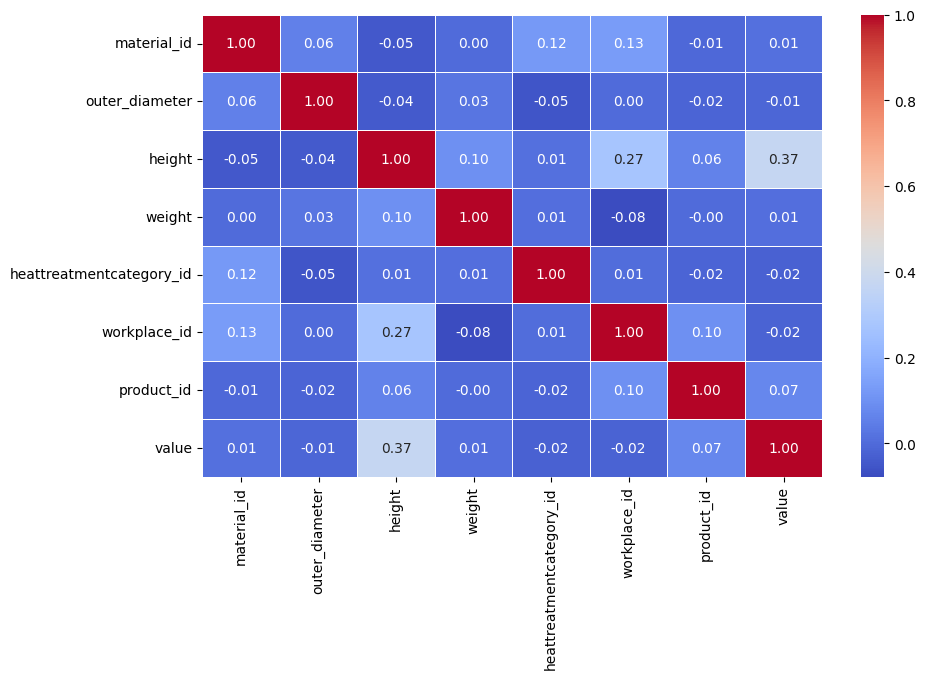

In [192]:
# Compute correlation matrix
numerical_columns_steel = clean_steel.select_dtypes(include=['number'])
corr_matrix = numerical_columns_steel.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

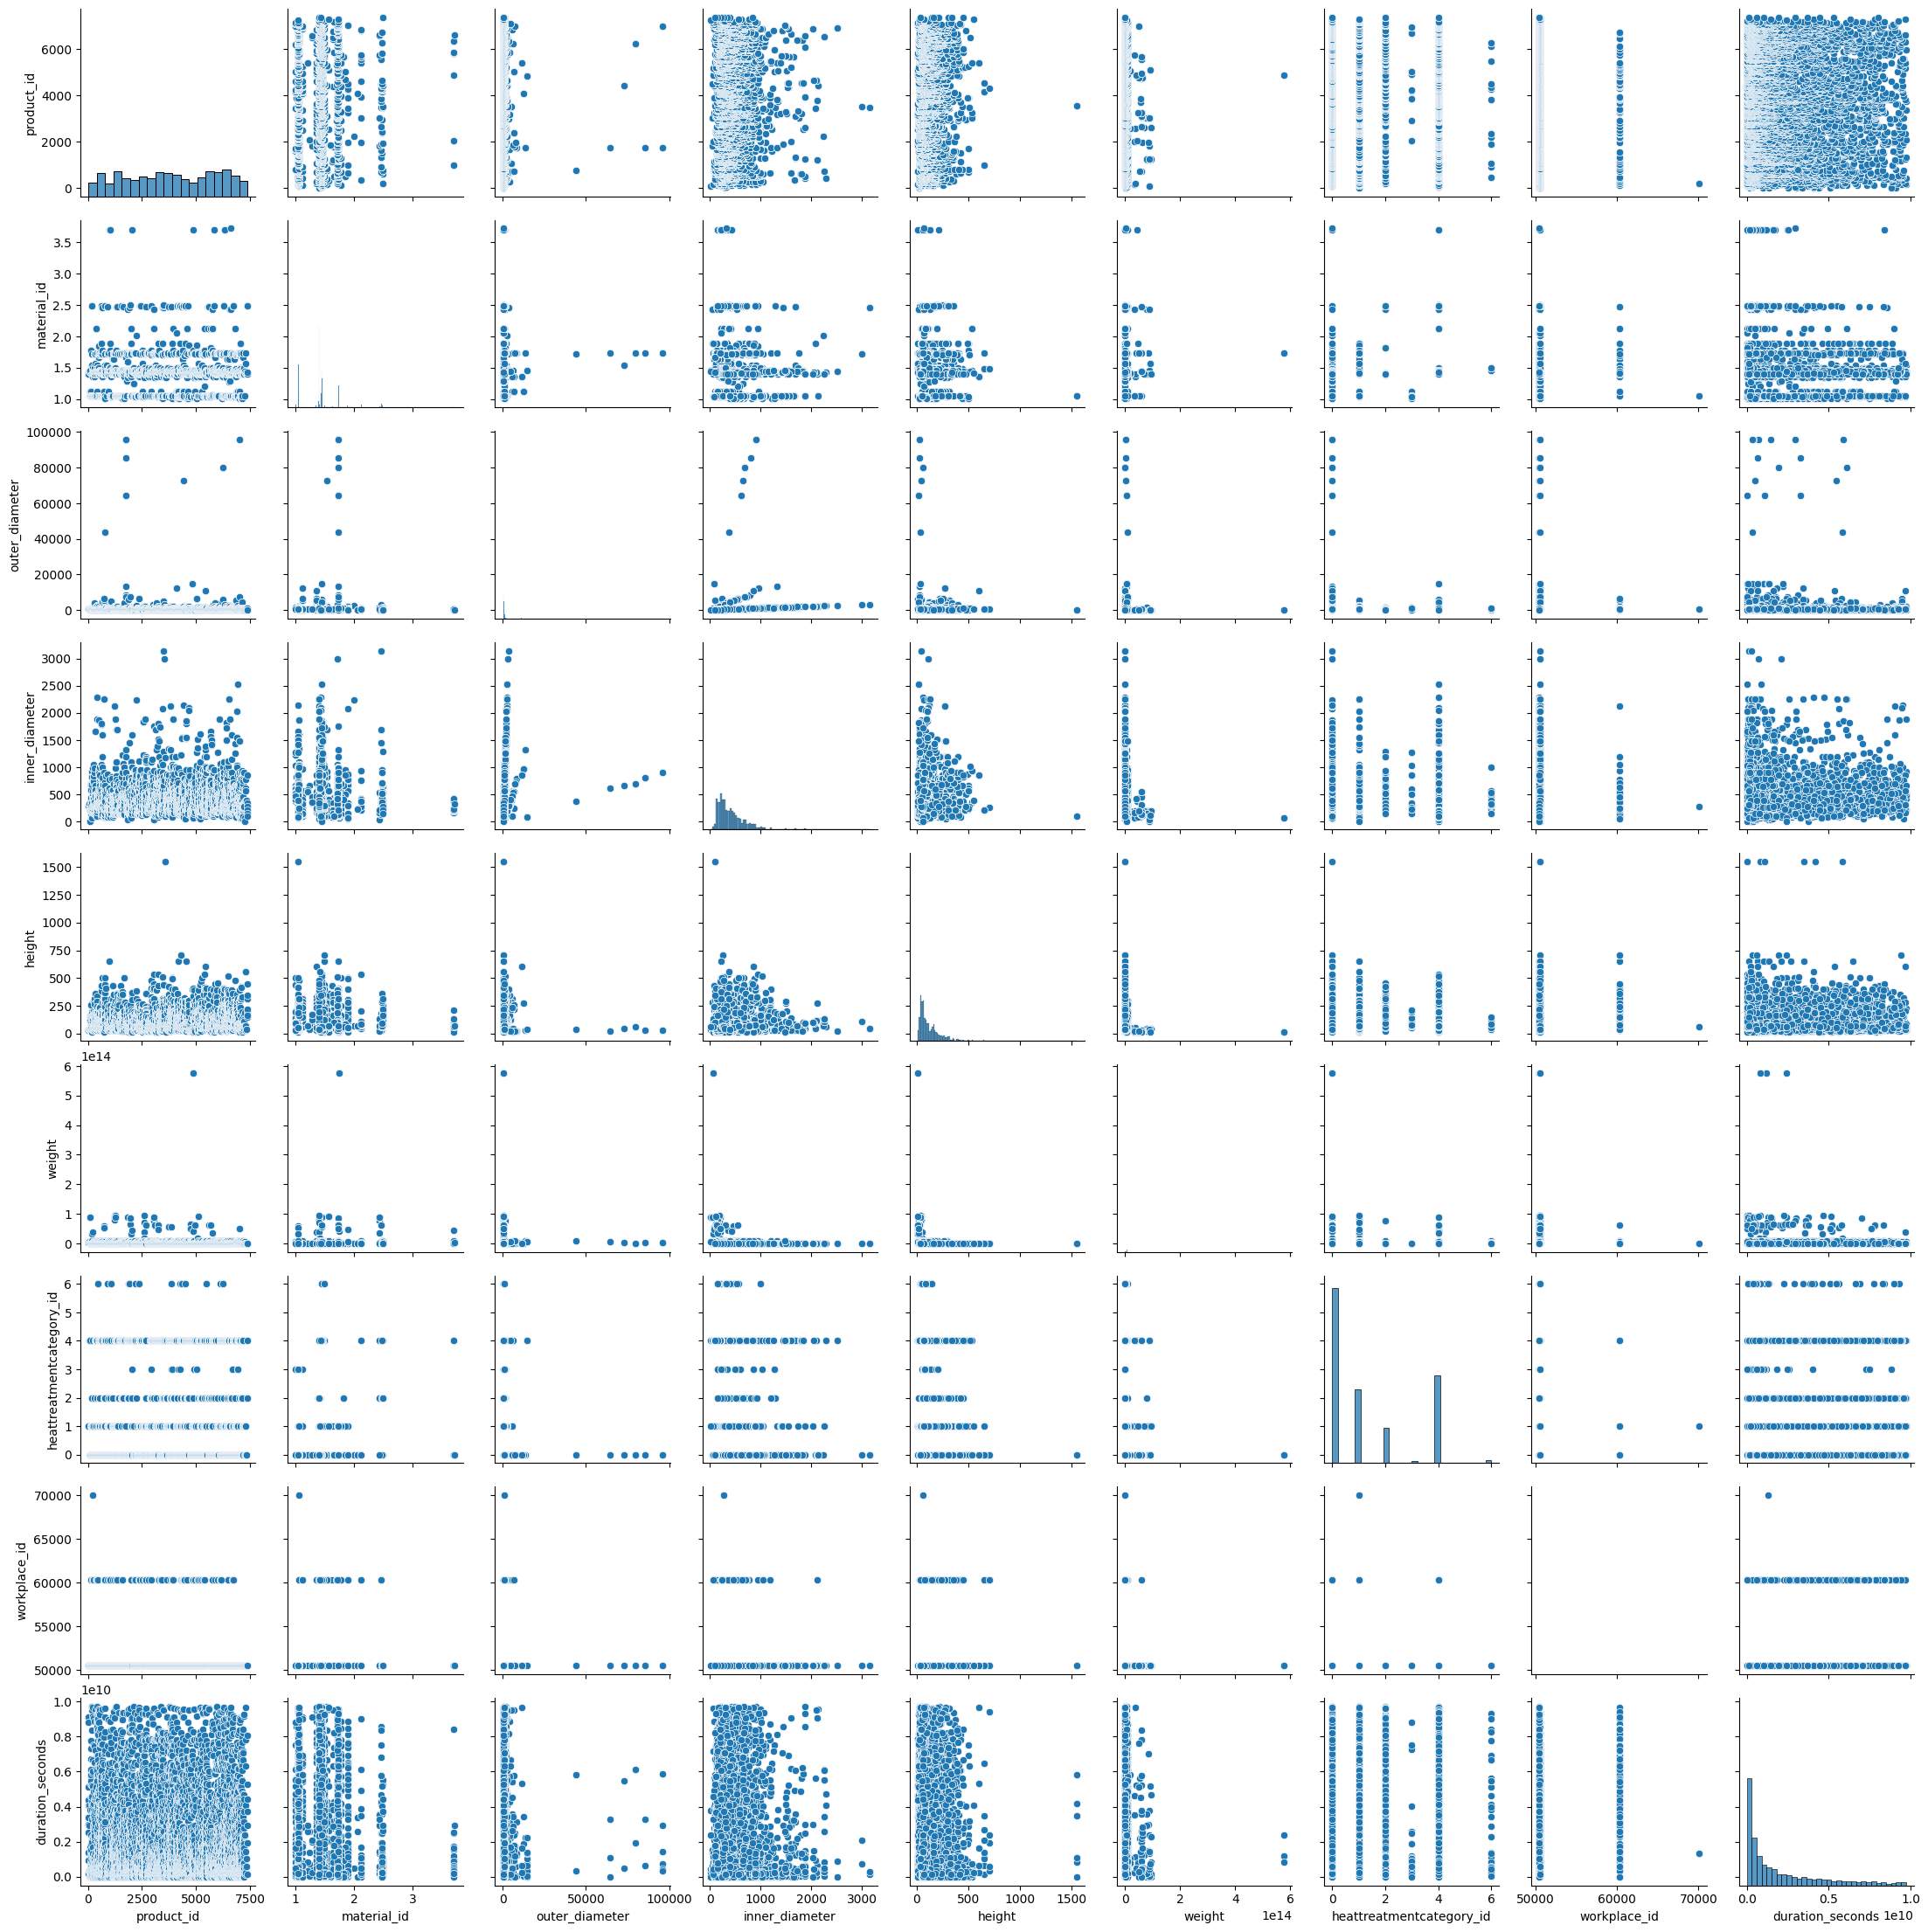

In [194]:
sns.pairplot(cleaned_clean_duration)
plt.show()

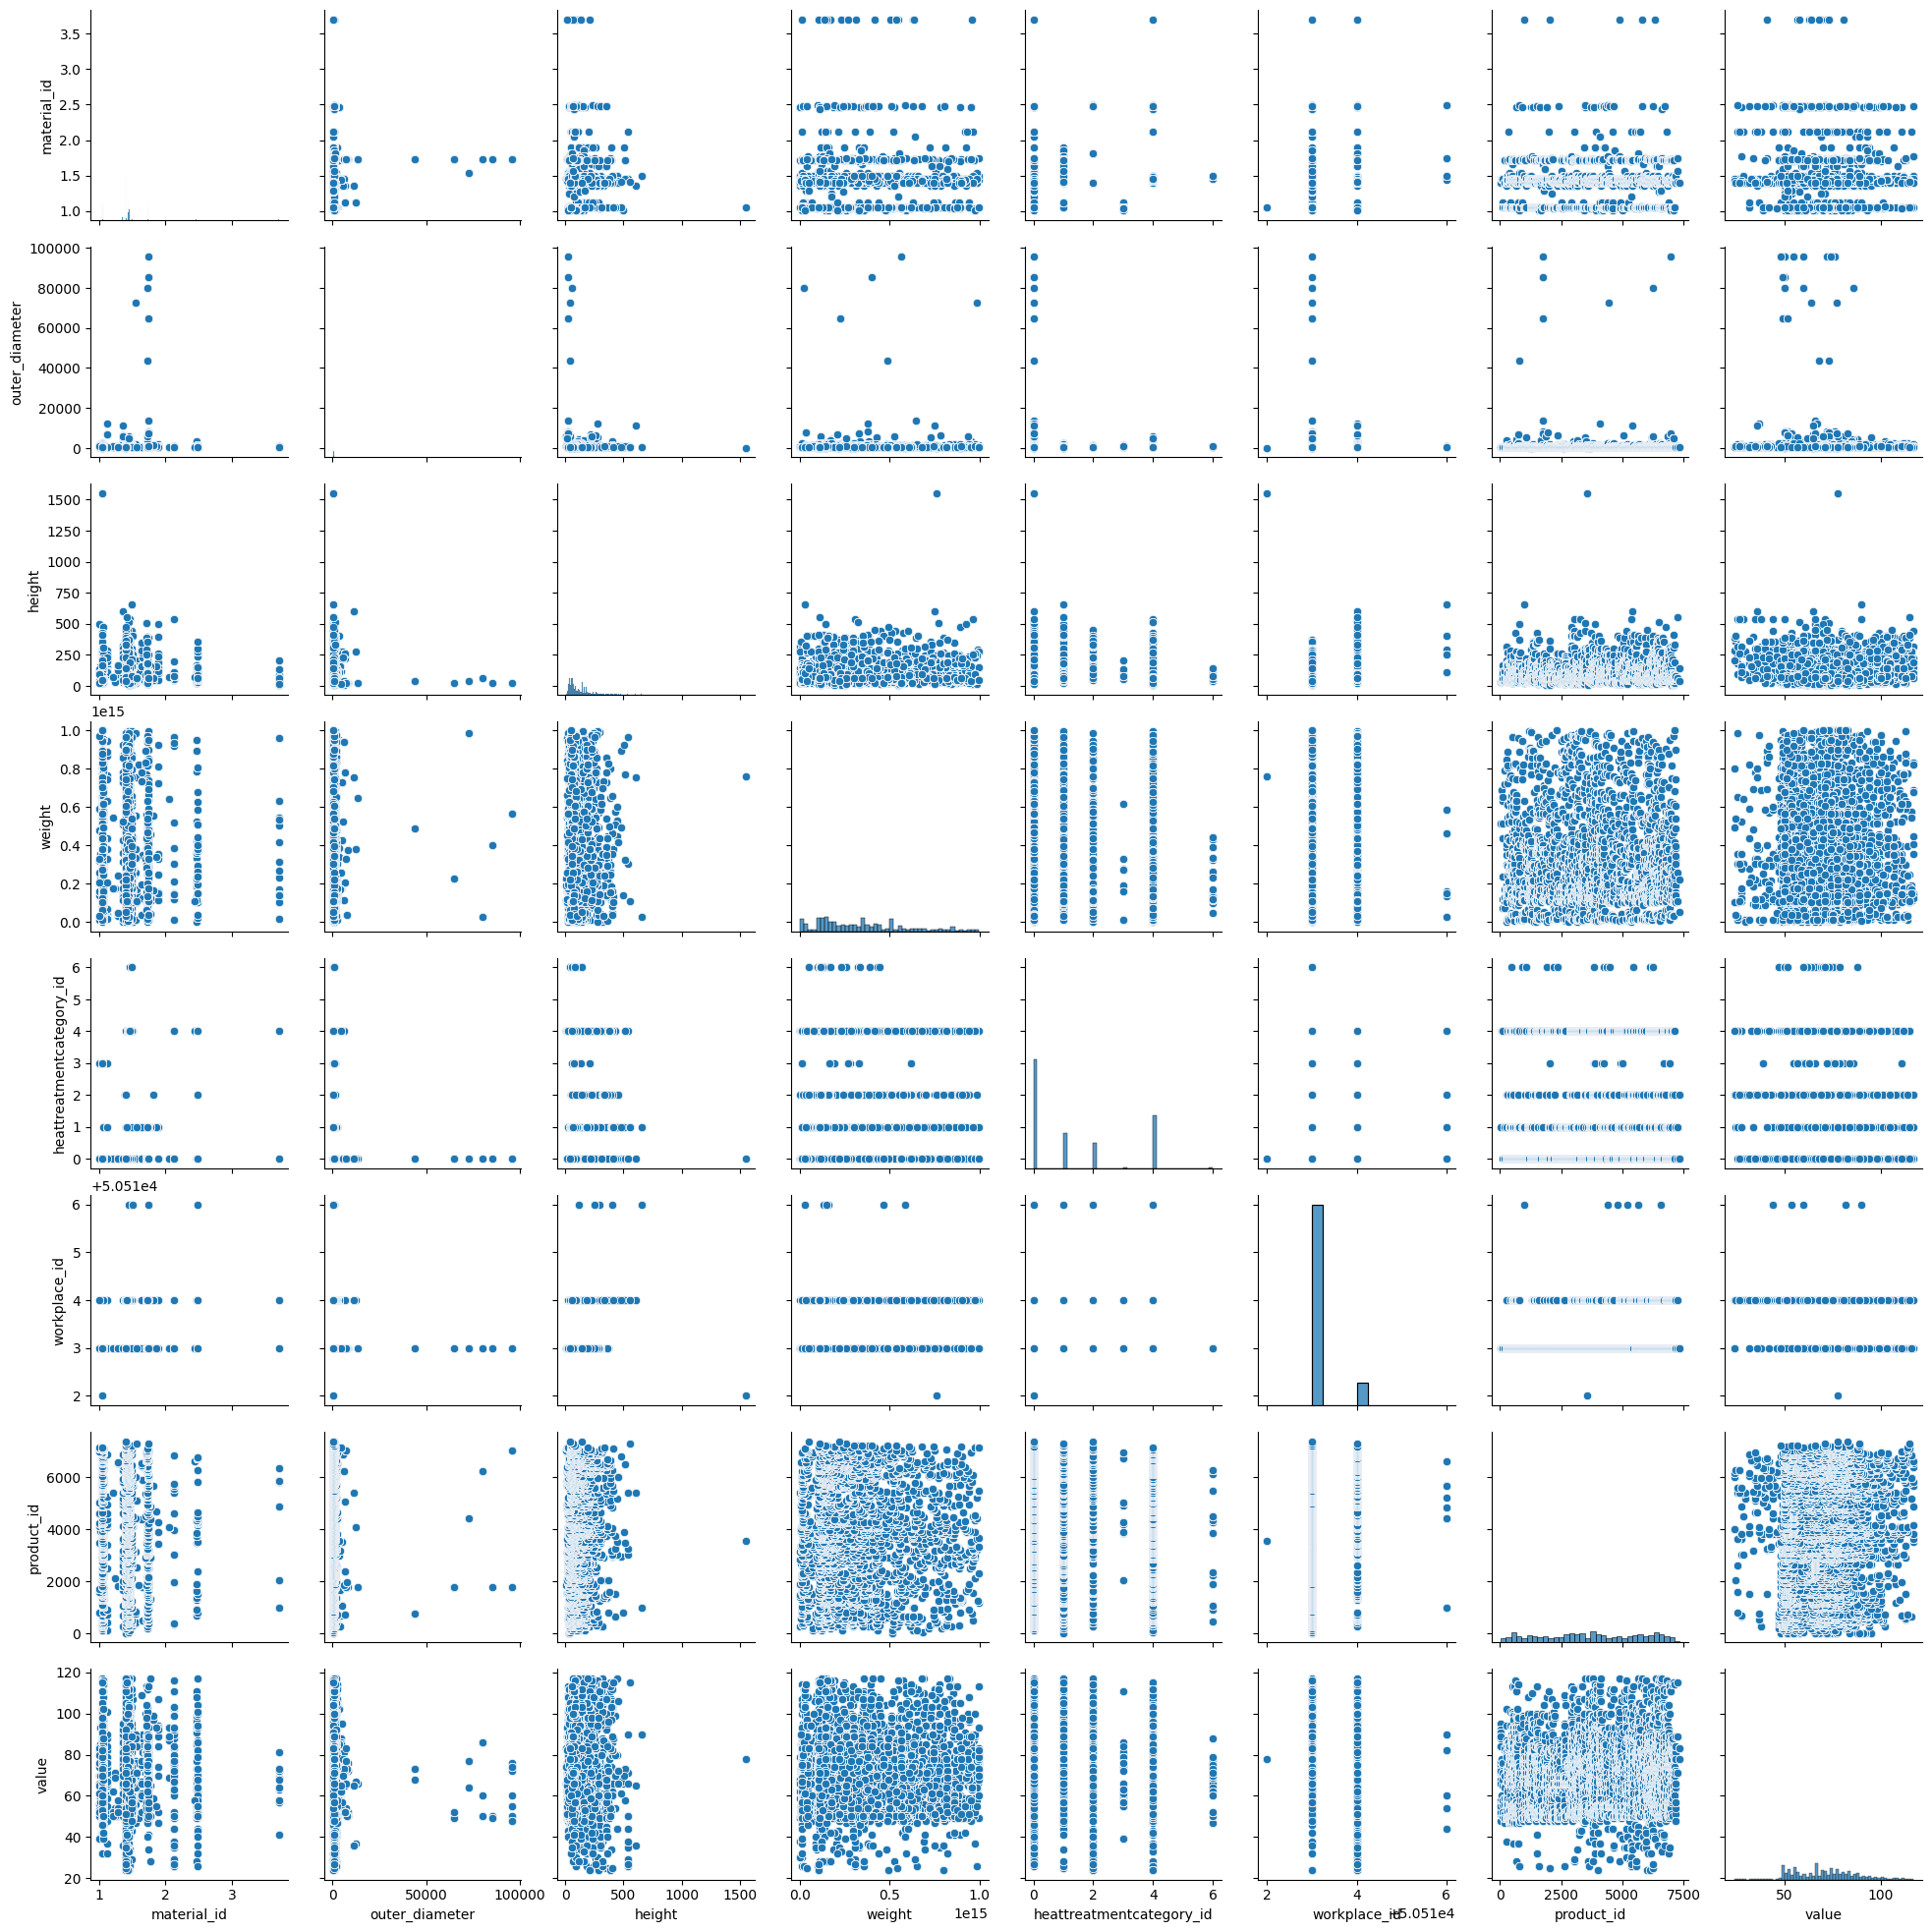

In [195]:
sns.pairplot(cleaned_clean_steel)
plt.show()

In [209]:
#encoding sting columns that are helpful
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cleaned_clean_steel['productcategory_id'] = le.fit_transform(cleaned_clean_steel['productcategory_id'])
cleaned_clean_duration['productcategory_id'] = le.fit_transform(cleaned_clean_duration['productcategory_id'])

#also datetime in cleaned steel
# Extract features
cleaned_clean_steel['year'] = cleaned_clean_steel['mes_datetime'].dt.year
cleaned_clean_steel['month'] = cleaned_clean_steel['mes_datetime'].dt.month
cleaned_clean_steel['day'] = cleaned_clean_steel['mes_datetime'].dt.day
cleaned_clean_steel['hour'] = cleaned_clean_steel['mes_datetime'].dt.hour
cleaned_clean_steel['weekday'] = cleaned_clean_steel['mes_datetime'].dt.weekday  

cleaned_clean_steel = cleaned_clean_steel.drop(columns=['mes_datetime'])

C:\Users\jmeri\AppData\Local\Temp\ipykernel_25648\3211720429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_clean_steel['productcategory_id'] = le.fit_transform(cleaned_clean_steel['productcategory_id'])
C:\Users\jmeri\AppData\Local\Temp\ipykernel_25648\3211720429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_clean_duration['productcategory_id'] = le.fit_transform(cleaned_clean_duration['productcategory_id'])
C:\Users\jmeri\AppData\Local\Temp\ipykernel_25648\3211720429.py:10: Sett

In [210]:
cleaned_clean_steel.dtypes

productcategory_id            int64
material_id                 float64
outer_diameter              float64
height                      float64
weight                      float64
heattreatmentcategory_id    float64
workplace_id                float64
product_id                  float64
value                       float64
year                          int32
month                         int32
day                           int32
hour                          int32
weekday                       int32
dtype: object

In [ ]:
#saving processed data
cleaned_clean_duration.to_excel('processed_duration.xlsxwi', index=False)
cleaned_clean_steel.to_excel('processed_steel.xlsx', index=False)